In [48]:
import numpy as np
from scipy import fftpack
from scipy.signal import welch
import matplotlib.pyplot as plt
plt.rc("font",size=14)

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# load data

In [50]:
x = np.load("./LES_25_w.npy")

In [51]:
# fig = plt.figure(figsize=(5,5))
# ax  = fig.add_subplot(111)
# p = ax.contourf(x,cmap='RdBu',levels=np.arange(-2,2.1,0.5))
# plt.colorbar(p)

# 2-dimensional fft

In [52]:
psd               = fftpack.fft2(x)
k                 = fftpack.fftfreq(len(x),d=25.0)
[kj,ki]           = np.meshgrid(k,k)

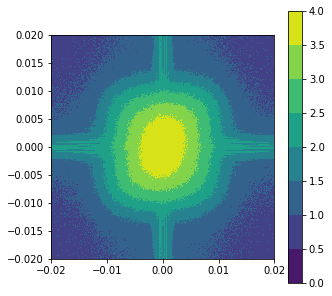

In [6]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111,aspect="equal")
p = ax.contourf(np.sort(k),
                np.sort(k),
                np.log10(fftpack.fftshift(np.abs(psd))),
                levels=np.arange(0,4.1,0.5));
plt.colorbar(p)

# filter psd beyond some cutoff wavenumber

In [61]:
k_cut         = 1/(1000.0)
idx           = np.where( (np.abs(kj)>k_cut) | (np.abs(ki)>k_cut) )

In [62]:
psd_filt      = psd.copy()

In [63]:
psd_filt[idx] = 0.0+0j

/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


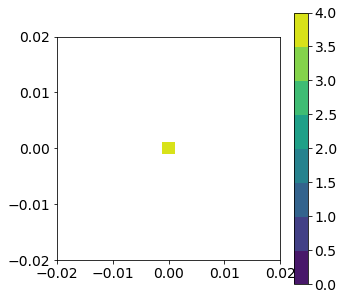

In [64]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111,aspect="equal")
p = ax.contourf(np.sort(k),
                np.sort(k),
                np.log10(fftpack.fftshift(np.abs(psd_filt))),
                levels=np.arange(0,4.1,0.5));
plt.colorbar(p)

# invert fft to get back the spatially filtered field

In [57]:
x_after = fftpack.ifft2(psd_filt).real

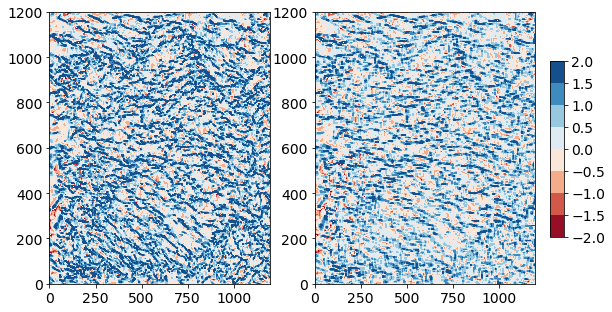

In [58]:
fig = plt.figure(figsize=(10,5))
ax  = {}
for iax,var in enumerate([x,x_after]):
    ax[iax]  = fig.add_subplot(1,2,iax+1)
    p = ax[iax].contourf(var,cmap='RdBu',levels=np.arange(-2,2.1,0.5))
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.255, 0.02, 0.49])
clb = fig.colorbar(p, cax=cbar_ax)

In [59]:
print("Maximum difference between PSD manually filtered, and PSD of filtered fields:")
print("(must be zero)")
print(np.max(np.abs(np.abs(psd_filt) - np.abs(fftpack.fft2(x_after)))))

Maximum difference between PSD manually filtered, and PSD of filtered fields:
(must be zero)
7.275957614183426e-12


# compare PSDs

/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


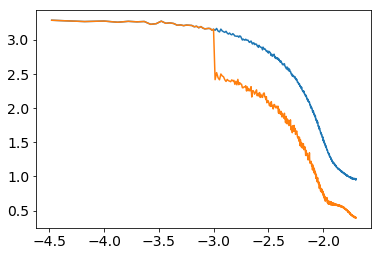

In [60]:
p1 = np.mean(np.abs(fftpack.fft2(x)),axis=0)
p3 = np.mean(np.abs(fftpack.fft2(x_after)),axis=0)
k1 = fftpack.fftfreq(len(x),d=25.0)

plt.plot(np.log10(k1),np.log10(p1))
plt.plot(np.log10(k1),np.log10(p3))

In [23]:
p1 = np.abs(fftpack.fft2(x))
p3 = np.abs(fftpack.fft2(x_after))
k1 = fftpack.fftfreq(len(x),d=25.0)

/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


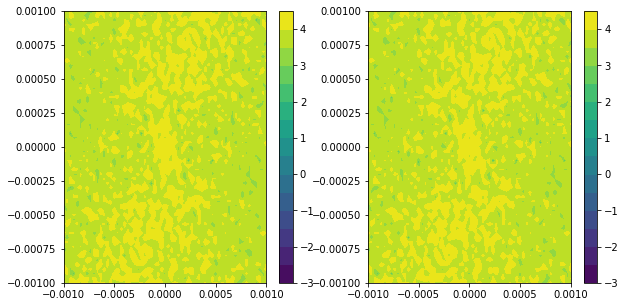

In [36]:
fig = plt.figure(figsize=(10,5))
ax  = {}
for iax,var in enumerate([p1,p3]):
    ax[iax] = fig.add_subplot(1,2,iax+1)
    p = ax[iax].contourf(np.sort(k1), np.sort(k1), np.log10(fftpack.fftshift(var)), levels=np.arange(-3,5,0.5))
    ax[iax].set_xlim([-k_cut,k_cut])
    ax[iax].set_ylim([-k_cut,k_cut])
    plt.colorbar(p)

In [ ]:
p1 = np.abs(fftpack.fft2(x))
p3 = np.abs(fftpack.fft2(x_after))
k1 = fftpack.fftfreq(len(x),d=25.0)

/glade/u/home/doubrawa/anaconda2/envs/wrfenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


4.440892098500626e-15


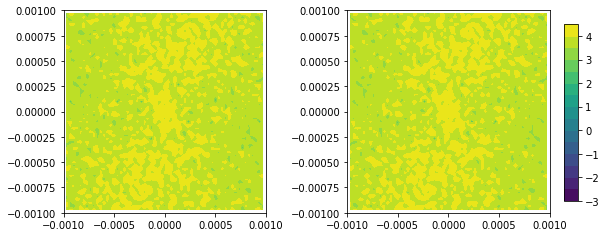

In [47]:
fig = plt.figure(figsize=(10,5))
ax  = {}
for iax,var in enumerate([p1,p3]):
    
    ax[iax] = fig.add_subplot(1,2,iax+1,aspect='equal')
    
    pp = np.log10(fftpack.fftshift(var))
    kk = np.sort(k1).copy()
    
    idx = np.where(np.abs(np.sort(kk)) < k_cut)
    i1,i2 = np.min(idx), np.max(idx)+1
    
    pp = pp[i1:i2,i1:i2].copy()
    kk = kk[i1:i2]

    a  = ax[iax].contourf(kk, kk, pp, levels=np.arange(-3,5,0.5))
    
    ax[iax].set_xlim([-k_cut,k_cut])
    ax[iax].set_ylim([-k_cut,k_cut])

    if iax==0:
        tt = pp.copy()
    
fig.subplots_adjust(right=0.8,wspace=0.4)
cbar_ax = fig.add_axes([0.82, 0.255, 0.02, 0.49])
clb = fig.colorbar(a, cax=cbar_ax)

print (np.max(np.abs(tt-pp)))